In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [7]:
#Cargar el conjunto de datos Iris

iris = load_iris()
x=iris.data
y=iris.target

#Normalización de los datos
#Nos interesa vectorizarla 

scaler=StandardScaler()
x=scaler.fit_transform(x)

In [8]:
#División del conjunto de datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=24)

# Creación del clasificador SVM
# kernel = 'linear' Tipo de kernel más adecuado para los problemas de clasificación
# c= 1.0 Determina la penalización por errores de clasificación

svm = SVC(kernel='linear', C=1.0, random_state=24)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [9]:
#Calcular la precisión
#Accuracy_score(): precición del modelo de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f'Precision del modelo: {accuracy:.2f}')

#score() se utiliza para medir la precisión del cjto de datos de prueba
score= svm.score(x_test,y_test)
print(f'Precisión 2:{score:.2f}')

#Mostrar la matriz de confusión y el informe de clasificación
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test, y_pred)


print('\nMatriz de  confusion:\n', conf_matrix)
print('\n Reporte de clasificacion:\n', class_report)

Precision del modelo: 0.93
Precisión 2:0.93

Matriz de  confusion:
 [[15  0  0]
 [ 0 10  2]
 [ 0  1 17]]

 Reporte de clasificacion:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      0.83      0.87        12
           2       0.89      0.94      0.92        18

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [11]:
# Calcular las "tripas" del algoritmo
import math

n = len (x)
k = 1 + int(3.3 * math.log10(n))

print(f"Número de clases recomendado para el dataset irir: {k}")
print(f'Número de vectores soporte por clas: {svm.n_support_}')
print(f'Los ínidces de los vectores soporte son: {svm.support_}')
print(f'La función de los vectores soporte es: {svm.decision_function(x)}')


Número de clases recomendado para el dataset irir: 8
Número de vectores soporte por clas: [ 2 12 10]
Los ínidces de los vectores soporte son: [ 36  63  10  19  24  42  43  45  50  52  57  62  82 103   9  31  37  49
  54  68  69  90  98 100]
La función de los vectores soporte es: [[ 2.25103591  1.29285155 -0.3037943 ]
 [ 2.24148511  1.29060084 -0.30137314]
 [ 2.25115584  1.29025989 -0.30245479]
 [ 2.24673219  1.2885823  -0.30096359]
 [ 2.25441196  1.29252739 -0.30407395]
 [ 2.24234694  1.29226056 -0.30240966]
 [ 2.25127438  1.28854447 -0.30160074]
 [ 2.24837975  1.29173495 -0.30285531]
 [ 2.24647039  1.28712565 -0.30017003]
 [ 2.24686118  1.29156132 -0.30256779]
 [ 2.2499658   1.29447263 -0.30453813]
 [ 2.24937739  1.29019286 -0.30217204]
 [ 2.24762776  1.29112299 -0.30242977]
 [ 2.25840876  1.28924632 -0.30305707]
 [ 2.25607774  1.2976804  -0.30701216]
 [ 2.25363143  1.2954382  -0.30550559]
 [ 2.24970281  1.29361293 -0.30403646]
 [ 2.24683936  1.29181708 -0.30270401]
 [ 2.23969041  1.2

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Representar gráficamente los resultados en un plano bidimensional usando PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)



In [22]:
# Visualizar los datos de entrenamiento
plt.figure(figsize=(10,6))

# Crear una malla para visualizar las regiones de decisión
x_min, x_max = x_pca[:,0].min()-1, x_pca[:,0].max()+1
y_min, y_max = x_pca[:,1].min()-1, x_pca[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

<Figure size 1000x600 with 0 Axes>

In [23]:
xx[:3]

array([[-3.7743447, -3.7543447, -3.7343447, ...,  4.2656553,  4.2856553,
         4.3056553],
       [-3.7743447, -3.7543447, -3.7343447, ...,  4.2656553,  4.2856553,
         4.3056553],
       [-3.7743447, -3.7543447, -3.7343447, ...,  4.2656553,  4.2856553,
         4.3056553]])

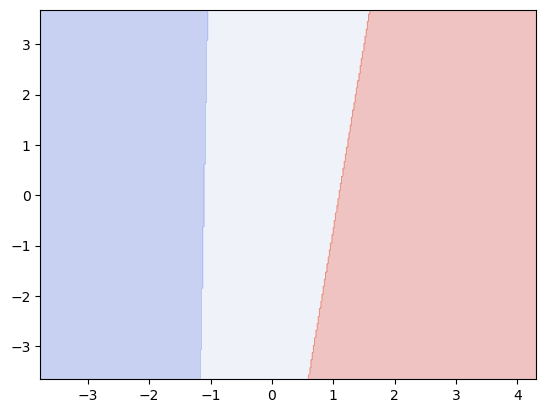

In [24]:
#Hacer predicciones en la malla

x_train, x_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.3, random_state=24)
svm=SVC(kernel='linear', C=1.0, random_state=24)
svm.fit(x_train, y_train)

# np.c_ ---> aplana  ravel() ---> aplana
zz = svm.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

# Visualizar las regiones de decisión
plt.contourf(xx, yy, zz, cmap = plt.cm.coolwarm, alpha=0.3)

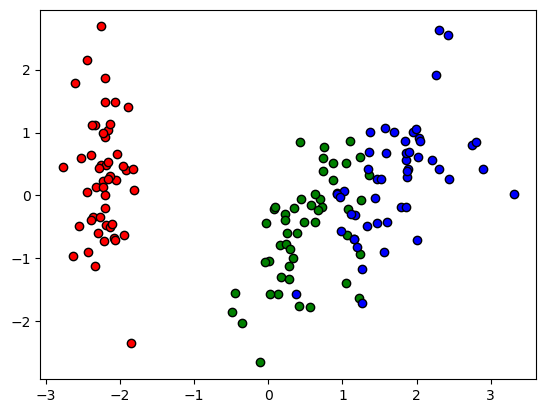

In [25]:
# zip() -> Realizamos dos iteraciones en paralelo (para la i y c)
for i, c in zip(range(3), ['red','green','blue']):
    plt.scatter(x_pca[y == i, 0],
                x_pca[y == i, 1],
                c=c,
                label = iris.target_names[i],
                edgecolors='k')

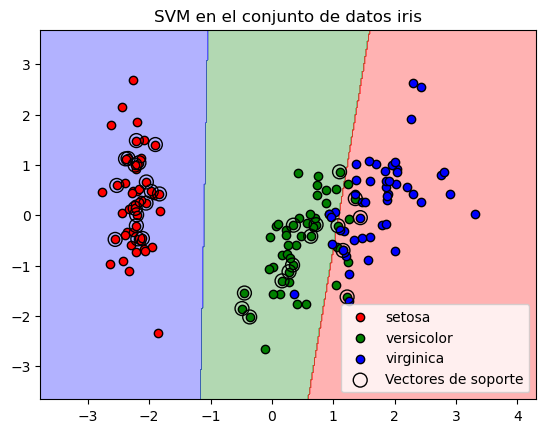

In [33]:
from matplotlib.colors import ListedColormap
#unimos fondo y puntitos

# np.c_ ---> aplana  ravel() ---> aplana
zz = svm.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

# Visualizar las regiones de decisión
plt.contourf(xx, yy, zz, cmap = ListedColormap(('blue','green','red')), alpha=0.3)

# zip() -> Realizamos dos iteraciones en paralelo (para la i y c)
for i, c in zip(range(3), ['red','green','blue']):
    plt.scatter(x_pca[y == i, 0],
                x_pca[y == i, 1],
                c=c,
                label = iris.target_names[i],
                edgecolors='k')
    
# Visualizar los vectores de soporte
plt.scatter(x_pca[svm.support_,0], x_pca[svm.support_,1],
            facecolor='none',
            edgecolors='k',
            s=100,
            label='Vectores de soporte')   

plt.title('SVM en el conjunto de datos iris')
plt.legend()
plt.show() 